# SAI SURAJ GUPTA

### Importing required modules

In [86]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_style("whitegrid")
import itertools
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler 
from sklearn.preprocessing import StandardScaler
import category_encoders as ce
import imblearn
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.tree import export_graphviz
import pydotplus
import matplotlib.image as mpimg
from sklearn import decomposition, datasets
from sklearn import tree
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
%matplotlib inline

#Misc to ignore warnings
import warnings
warnings.filterwarnings("ignore")

### Importing required data from excel and csv files and converting them into Dataframes

In [4]:
Hr_DataFrame=pd.read_csv("HR_Hiring_details_transaction.csv",encoding="latin")

Joining_Status=pd.read_csv("Joining_Status.csv",encoding='latin')

Location_id_name_data=pd.read_excel("Location_Master.xlsx")

Region_Name_Data=pd.read_excel("Region_Master.xlsx")

Region_id_data=pd.read_excel("Region_Location_Mapping.xlsx")

Home_State_of_candidate=pd.read_excel("Domicile_Master.xlsx")

lob=pd.read_csv("LOB_Master.csv")

### Merging the dataframes on common key

In [5]:
merged_Hr_Joining_status=pd.merge(Hr_DataFrame,Joining_Status,on="Candidate_Ref")

merged_Candidate_location_info=pd.merge(merged_Hr_Joining_status,Location_id_name_data,on="Location_ID")

merged_Candidate_Joining_city=pd.merge(merged_Candidate_location_info,Region_id_data,on="Location_ID")

merged_Candidate_region=pd.merge(merged_Candidate_Joining_city,Region_Name_Data,on="Region_ID")

merged_Candidate_Full_info=pd.merge(merged_Candidate_region,Home_State_of_candidate,on="Domicile_Id")

final_df=pd.merge(merged_Candidate_Full_info,lob,on="LOB_Id")

data_for_model=final_df.copy()


##  Data Visualization With Python

##### The total count of candidates and filtering by the ones who "Joined"

In [6]:
Joined_percentage=(merged_Candidate_Full_info[merged_Candidate_Full_info["Status"]=="Joined"].shape[0]/merged_Candidate_Full_info.shape[0])*100
Not_joined_percentage = 100 - Joined_percentage

#####  Visualization of  joined_percentage and not_joined_percentage

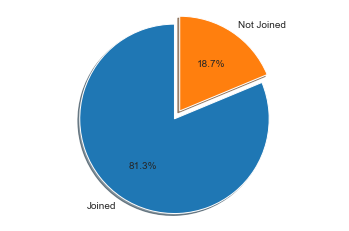

In [7]:
labels = ["Joined","Not Joined"]
sizes = [Joined_percentage,Not_joined_percentage]
explode = (0, 0.1)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

#### Inference
>Most of the candidates i.e 81.3% of total candidates have joined the company and only 18.7% have not.

#### Analysis of candidates on the basis of joining bonus

#####  Visualization of  the number of candidates who have/have not received joining bonus

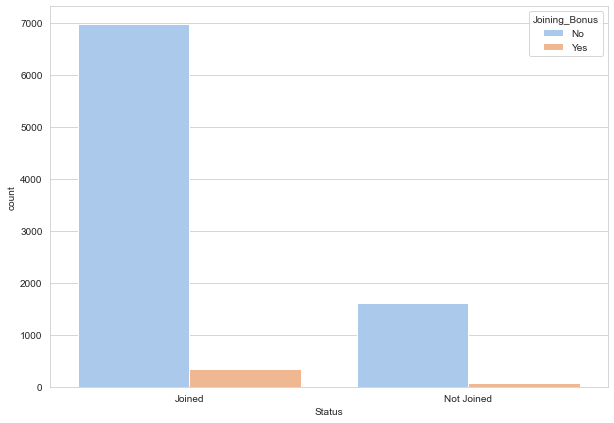

In [8]:
fig = plt.gcf()
fig.set_size_inches(10,7)
fig = sns.countplot(x= merged_Candidate_Full_info["Status"],hue="Joining_Bonus",data= merged_Candidate_Full_info,palette='pastel')

#### Inference
>Majority of candidates who haven't joined did not receive joining bonus.

#### Visualization of people whose notice period is more than 30 days and have not joined/joined.

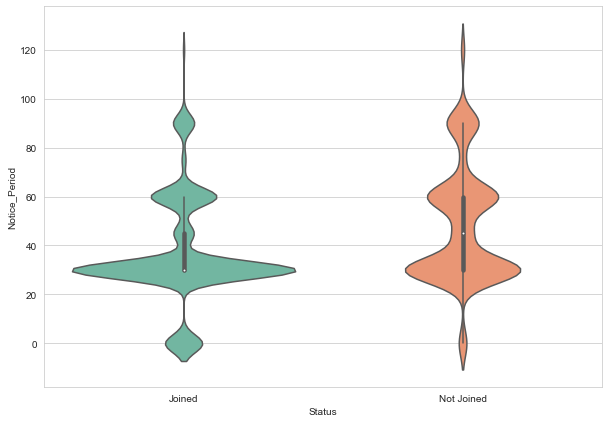

In [9]:
fig=plt.gcf()
fig.set_size_inches(10,7)
fig = sns.violinplot(x="Status",y="Notice_Period",data=merged_Candidate_Full_info,palette='Set2')

#### Inference
>Mean duration of candidates who have joined is 30 days and for the candidates who haven't joined is 45 days.

#### Analysis of candidates on the basis of candidate source

<Figure size 1440x1080 with 0 Axes>

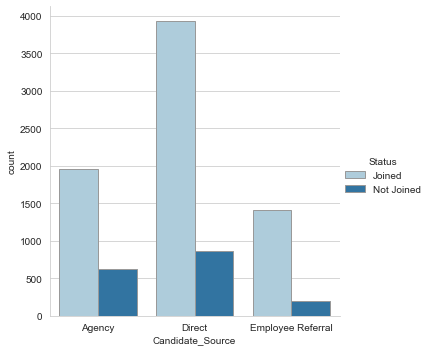

In [10]:
fig = plt.gcf()
fig.set_size_inches(20,15)
fig = sns.catplot(x="Candidate_Source", hue="Status", kind="count",
            palette="Paired", edgecolor=".6",
            data=merged_Candidate_Full_info)

#### Inference
>More referrals should be provided or more hiring should be done through referrals as candidate is more likely to join the company

#### Plot of candidates who are not joining in a particular location

In [11]:
result=merged_Candidate_Full_info[merged_Candidate_Full_info["Status"]=="Not Joined"]

In [12]:
cmaps = ['tab:blue','tab:orange','tab:green','tab:red','tab:purple','tab:brown','tab:pink','tab:gray','tab:olive','tab:cyan']

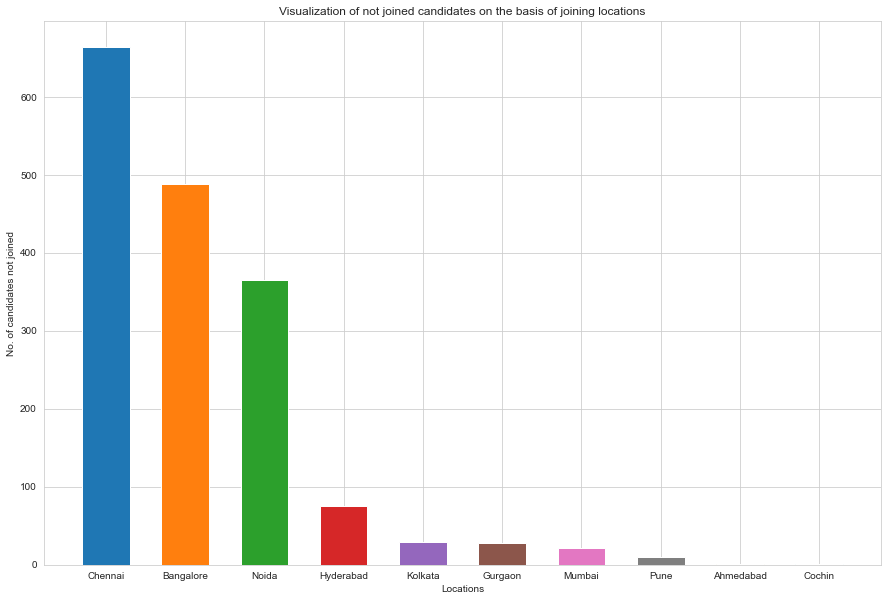

In [13]:
result=merged_Candidate_Full_info[merged_Candidate_Full_info["Status"]=="Not Joined"]
result=merged_Candidate_Full_info[merged_Candidate_Full_info["Status"]=="Not Joined"]
location_status=dict(result['Location'].value_counts())
locations=list(location_status.keys())
count_not_joined=list(location_status.values())
fig=plt.figure(figsize=(15,10))
plt.bar(locations,count_not_joined,color=cmaps,width=0.6)
plt.xlabel("Locations")
plt.ylabel("No. of candidates not joined")
plt.title("Visualization of not joined candidates on the basis of joining locations")
plt.show()


#### Inference
>The top three locations where candidates are not joining are Chennai,Bangalore and Noida.

### Analysis on  joining status depend on the duration to accept an offer

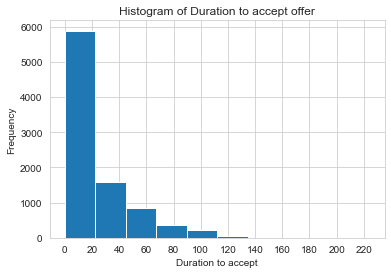

In [14]:
merged_Candidate_Full_info.Duration_to_accept_offer.hist()
plt.title('Histogram of Duration to accept offer')
plt.xlabel('Duration to accept')
plt.ylabel('Frequency')
plt.xticks(np.arange(min(merged_Candidate_Full_info["Duration_to_accept_offer"]),max(merged_Candidate_Full_info["Duration_to_accept_offer"])+1,20))
plt.savefig('hist_duration')

#### Inference
>Candidates are accepting the offer if the duration to accept the offer is lower

### 5.Hike offered has an impact on joining status.

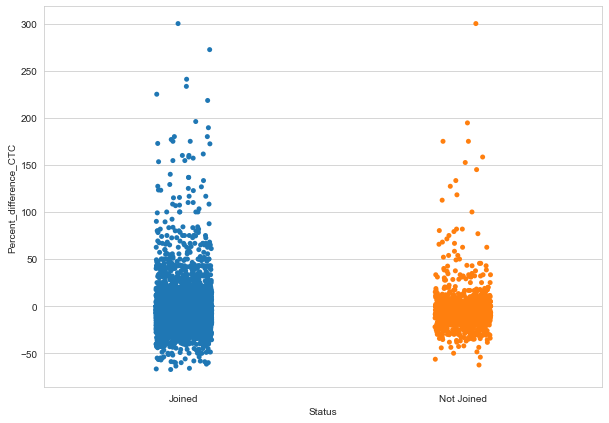

In [15]:
fig=plt.gcf()
fig.set_size_inches(10,7)
fig = sns.stripplot(x='Status',y="Percent_difference_CTC", data=merged_Candidate_Full_info)

#### Inference
>Candidate is more likely to join if the hike offered is more

##  Exploratory Data Analysis

### 1- Univariate, Bi- Variate and Multi- Variate Analysis

### > Univariate Analysis

#### Descriptive statistics of numerical datatypes

In [16]:
final_df[["Duration_to_accept_offer","Notice_Period",
         "Percent_hike_expected_in_CTC","Percent_hike_offered_in_CTC",
         "Percent_difference_CTC","Rex_in_Yrs","Age"]].describe()

,Duration_to_accept_offer,Notice_Period,Percent_hike_expected_in_CTC,Percent_hike_offered_in_CTC,Percent_difference_CTC,Rex_in_Yrs,Age
count,8982.000000,8982.000000,8982.000000,8982.000000,8982.000000,8982.000000,8967.000000
mean,21.450902,39.300267,43.861913,40.653018,-1.574218,4.240036,29.910784
std,25.823413,22.223764,29.797047,36.079784,19.623303,2.548636,4.096219
min,0.000000,0.000000,-68.830000,-60.530000,-67.270000,0.000000,20.000000
25%,3.000000,30.000000,27.270000,22.075000,-8.345000,3.000000,27.000000
50%,10.000000,30.000000,40.000000,35.960000,0.000000,4.000000,29.000000
75%,33.000000,60.000000,53.850000,50.000000,0.000000,6.000000,34.000000
max,224.000000,120.000000,359.770000,471.430000,300.000000,24.000000,60.000000


####  Analysing  variable "Status"

In [17]:
final_df["Status"].value_counts()

Joined        7300
Not Joined    1682
Name: Status, dtype: int64

#### Percentage Analysis of variable "Status"

In [18]:
target_percent = (final_df["Status"].value_counts()/final_df.shape[0]*100).round(2)
target_percent

Joined        81.27
Not Joined    18.73
Name: Status, dtype: float64

#### >> Visualizing the above details using Count plot

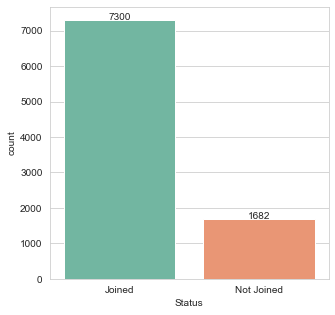

In [19]:
fig, ax1 = plt.subplots(figsize = (5,5))
graph = sns.countplot(ax=ax1, x="Status", data=final_df,palette="Set2")
graph.set_xticklabels(graph.get_xticklabels(),rotation=0)
for p in graph.patches:
    height = p.get_height()
    graph.text(p.get_x()+p.get_width()/2., height + 0.1,height , ha="center")

#### Inference
> Most of the candidates have joined the company ( 81.3 % ) 

### Combined Univariate analysis on few categorical variables using count plot

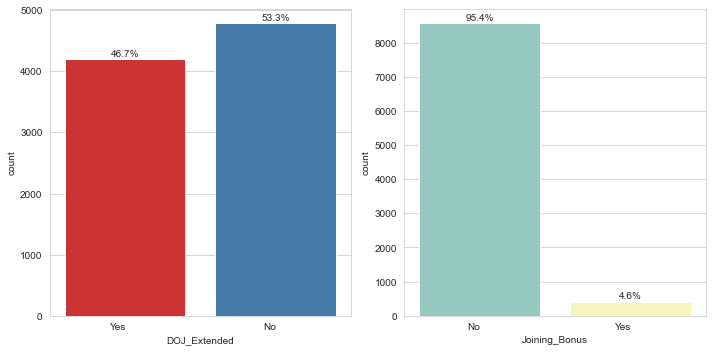

In [20]:
fig,axes = plt.subplots(1,2, figsize=(10,5))
ax = sns.countplot(data=final_df, x='DOJ_Extended' ,ax=axes[0],palette="Set1")
bx = sns.countplot(data=final_df, x='Joining_Bonus' ,ax=axes[1],palette="Set3")
ax.set_xticklabels(ax.get_xticklabels(), rotation=0, ha="right")
total = len(final_df)
for p in ax.patches:
    percentage = f'{100 * p.get_height() / total:.1f}%\n'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='center')

bx.set_xticklabels(bx.get_xticklabels(), rotation=0, ha="right")
total = len(final_df)
for p in bx.patches:
    percentage = f'{100 * p.get_height() / total:.1f}%\n'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    bx.annotate(percentage, (x, y), ha='center', va='center')
plt.tight_layout()
plt.show()

#### Inference
>Maximum number of candidates (53.3 %) have not recieved an extension in Date of Joining.

>There is a huge margin between the number of candidates who have recieved the joining bonus (4.6 %) and those who have not recieved it (95.4 %)

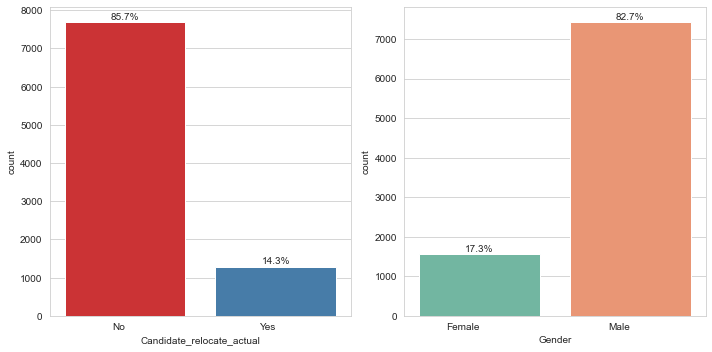

In [21]:
fig,axes = plt.subplots(1,2, figsize=(10,5))
ax = sns.countplot(data=final_df, x='Candidate_relocate_actual' ,ax=axes[0],palette="Set1")
bx = sns.countplot(data=final_df, x='Gender' ,ax=axes[1],palette="Set2")
ax.set_xticklabels(ax.get_xticklabels(), rotation=0, ha="right")
total = len(final_df)
for p in ax.patches:
    percentage = f'{100 * p.get_height() / total:.1f}%\n'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='center')

bx.set_xticklabels(bx.get_xticklabels(), rotation=0, ha="right")
total = len(final_df)
for p in bx.patches:
    percentage = f'{100 * p.get_height() / total:.1f}%\n'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    bx.annotate(percentage, (x, y), ha='center', va='center')
plt.tight_layout()
plt.show()

#### Inference
    
>Most of the candidates are not willing to relocate.

>Most of the candidates are men.

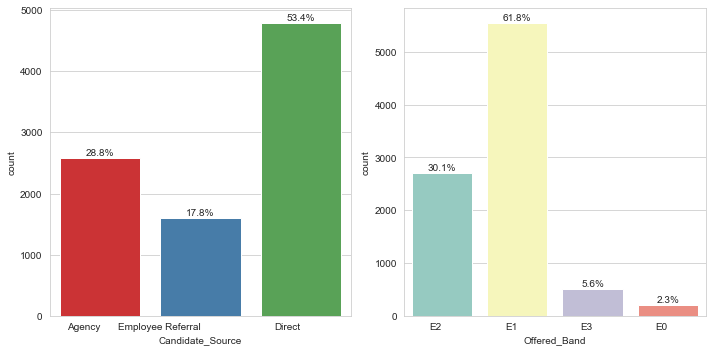

In [22]:
fig,axes = plt.subplots(1,2, figsize=(10,5))
ax = sns.countplot(data=final_df, x='Candidate_Source' ,ax=axes[0],palette="Set1")
bx = sns.countplot(data=final_df, x='Offered_Band' ,ax=axes[1],palette="Set3")
ax.set_xticklabels(ax.get_xticklabels(), rotation=0, ha="right")
total = len(final_df)
for p in ax.patches:
    percentage = f'{100 * p.get_height() / total:.1f}%\n'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='center')

bx.set_xticklabels(bx.get_xticklabels(), rotation=0, ha="right")
total = len(final_df)
for p in bx.patches:
    percentage = f'{100 * p.get_height() / total:.1f}%\n'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    bx.annotate(percentage, (x, y), ha='center', va='center')
plt.tight_layout()
plt.show()

#### Inference
>Most number of the candidates are hired directly, followed by Agency hiring and Employee Referral.

>E1 is the most offered band for the candidates.


### Univariate analysis on few variables using dist plot

<AxesSubplot:xlabel='Age', ylabel='Density'>

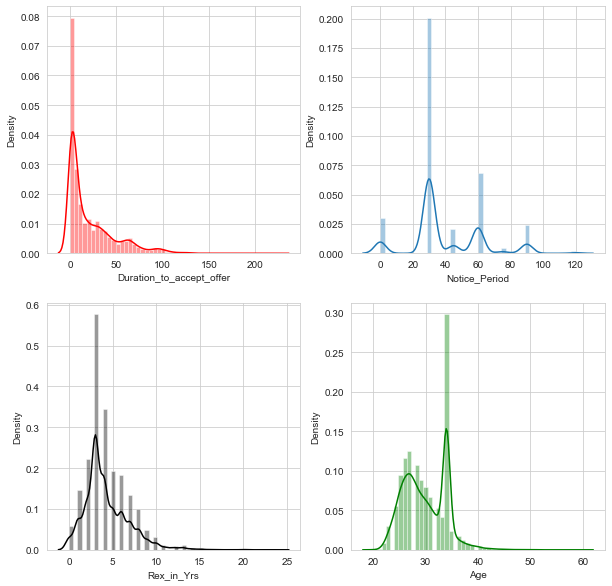

In [23]:
fig,axes = plt.subplots(2,2, figsize=(10,10))
sns.distplot(final_df["Duration_to_accept_offer"], kde =True, ax=axes[0,0],color="red")
sns.distplot(final_df["Notice_Period"], kde =True, ax=axes[0,1])
sns.distplot(final_df["Rex_in_Yrs"], kde =True, ax=axes[1,0],color='black')
sns.distplot(final_df["Age"], kde =True, ax=axes[1,1],color='green')


#### Inferences:

>Most of the candidates have been given a duration between 0-20 days to accept the offer. 

>Notice period between 20-40 days is the most common duration given to the candidates.

>Most of the candidates appear to have working experience for around 3 years.

>Most of the candidates are between the ages of 30-40.

### > Bi-Variate Analysis

#### Variables: Joining Bonus and Status

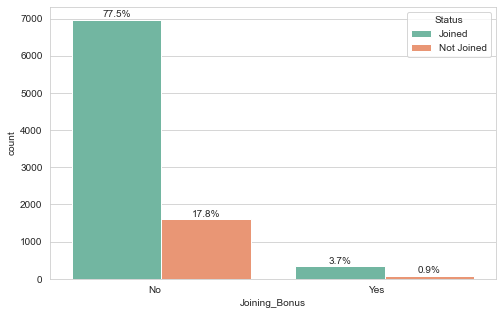

In [24]:
fig, ax1 = plt.subplots(figsize=(8,5))
ax = sns.countplot(ax=ax1, data=final_df, x = "Joining_Bonus", hue="Status",palette="Set2")
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
ax.set_xticklabels(ax.get_xticklabels(), rotation=0, ha="right")
total = len(final_df)
for p in ax.patches:
    percentage = f'{100 * p.get_height() / total:.1f}%\n'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='center')

#### Inference 

> Candidates are joining even if no joining bonus is provided. Hence, joining bonus is not a major factor which affects the joining status.

#### Variables: Candidate source and Status

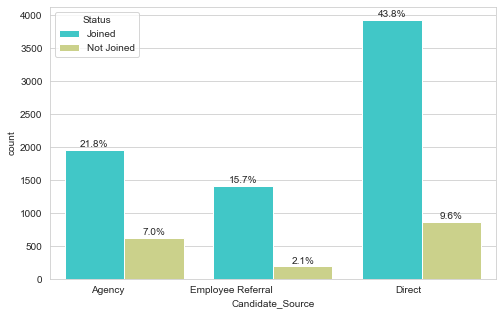

In [25]:
fig, ax1 = plt.subplots(figsize=(8,5))
ax = sns.countplot(ax=ax1, data=final_df, x = "Candidate_Source", hue="Status", palette="rainbow")
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
ax.set_xticklabels(ax.get_xticklabels(), rotation=0, ha="right")
total = len(final_df)
for p in ax.patches:
    percentage = f'{100 * p.get_height() / total:.1f}%\n'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='center')

#### Inference

> Most of the candidates are preferring to join the company irrespective of the source of hiring

#### Variables: Offered Band and Rex_years

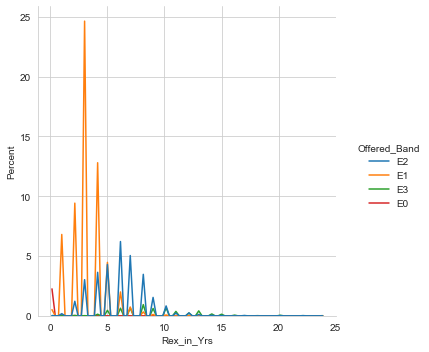

In [26]:
sns.displot(data=final_df, x="Rex_in_Yrs", hue="Offered_Band",kind="hist", stat="percent", element="poly", fill=False,)

#### Inference

1. Most of the candidates who have experience of 0-5 years particularly are offered with band E1. 
2. Candidates who have experience of more than 5 years are offered with band E2.

> We can infer that, Years of experience is a good factor to determine the offered band for the candidate.

#### Variables: Age and Status

<AxesSubplot:title={'center':'Age'}, xlabel='Status'>

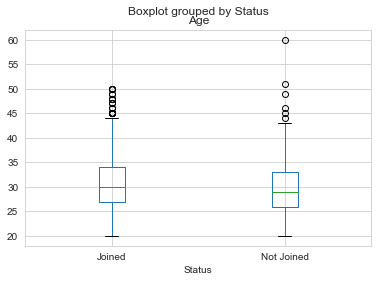

In [27]:
final_df.boxplot(column="Age", by="Status")

#### Inference

1. From the above box plot we can infer that candidates aged mostly between 27-34 are joining the company. 
2. Most of the younger candidates (<27) are not joining.
> Hence age is a good factor to determine whether the candidate is joining or not

### > Multi-Variate Analysis

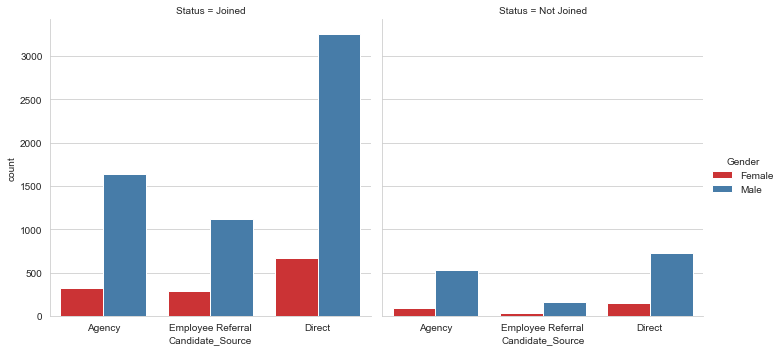

In [28]:
sns.catplot(data=final_df,col = "Status",x = "Candidate_Source", hue="Gender",kind = "count",palette="Set1")

#### Inference

>  The highest number of candidates who were hired directly and have joined the company are males.

## Missing values identification and treatment 

In [29]:
final_df.isnull().sum()

Sno                              0
Candidate_Ref                    0
DOJ_Extended                     0
Duration_to_accept_offer         0
Notice_Period                    0
Offered_Band                    13
Percent_hike_expected_in_CTC     0
Percent_hike_offered_in_CTC      0
Percent_difference_CTC           0
Joining_Bonus                    0
Candidate_relocate_actual        0
Gender                           0
Candidate_Source                 0
Rex_in_Yrs                       0
Location_ID                      0
Postal_Code                      0
Age                             15
LOB_Id                           0
Domicile_Id                      0
Status                           0
Location                         0
Region_ID                        0
Region_Name                      0
Domicile_Name                    0
LOB                              0
dtype: int64

##### Inference
>We can see some null values in two of our columns ('Age','Offered_Band')

In [30]:
final_df=final_df[final_df['Age'].notna()]
final_df=final_df[final_df['Offered_Band'].notna()]
final_df.isnull().sum()


Sno                             0
Candidate_Ref                   0
DOJ_Extended                    0
Duration_to_accept_offer        0
Notice_Period                   0
Offered_Band                    0
Percent_hike_expected_in_CTC    0
Percent_hike_offered_in_CTC     0
Percent_difference_CTC          0
Joining_Bonus                   0
Candidate_relocate_actual       0
Gender                          0
Candidate_Source                0
Rex_in_Yrs                      0
Location_ID                     0
Postal_Code                     0
Age                             0
LOB_Id                          0
Domicile_Id                     0
Status                          0
Location                        0
Region_ID                       0
Region_Name                     0
Domicile_Name                   0
LOB                             0
dtype: int64

>Here we have dropped the rows having null values because they are very isolated rows having null values and hence it will not influence the meaning of the data

### > Analyzing Duplicate Values

In [31]:
dv = final_df.duplicated()
print(dv.sum())

0


## Outlier analysis and treatment 

##### Function to find and remove outliers using inter-quartile range

In [32]:
def removeoutlier(column):
    sorted(column)
    q1, q2 = column.quantile([0.25,0.75])
    IQR = q2 - q1
    LR = q1 - (1.5 * IQR)
    UR = q2 + (1.5 * IQR)
    return LR,UR

##### > Outliers in column 'Notice_Period' 

<function matplotlib.pyplot.show(close=None, block=None)>

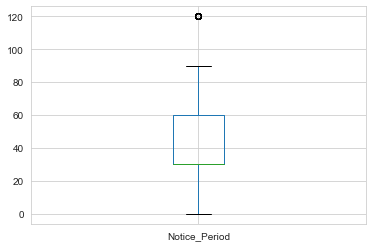

In [33]:
final_df.boxplot(column = ['Notice_Period'])
plt.show

>We notice a single outlier in Notice Period (120 days) which might not necessarily be an error. Hence, we are ignoring it.

##### > Outliers in column 'Duration_to_accept_offer  

<function matplotlib.pyplot.show(close=None, block=None)>

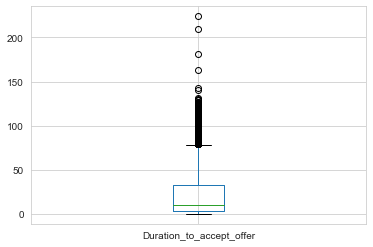

In [34]:
final_df.boxplot(column = ['Duration_to_accept_offer'])
plt.show

> We notice an outliers in column Duration_to_accept_offer above 60 (approx)

##### >> Outlier treatment for Duration_to_accept_offer column

<function matplotlib.pyplot.show(close=None, block=None)>

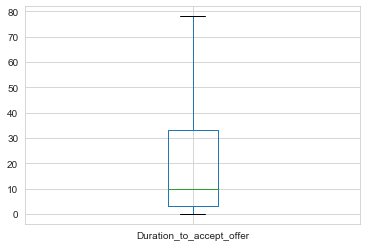

In [35]:
LS,HS = removeoutlier(final_df['Duration_to_accept_offer'])
final_df['Duration_to_accept_offer'] = np.where(final_df['Duration_to_accept_offer'] > HS,HS,final_df['Duration_to_accept_offer'])
final_df['Duration_to_accept_offer'] = np.where(final_df['Duration_to_accept_offer'] < LS,LS,final_df['Duration_to_accept_offer'])
final_df.boxplot(column=['Duration_to_accept_offer'])
plt.show

##### > Outliers in column 'Percent_hike_expected_in_CTC'

<function matplotlib.pyplot.show(close=None, block=None)>

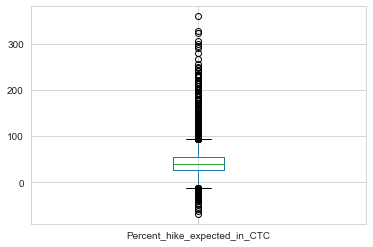

In [36]:
final_df.boxplot(column = ['Percent_hike_expected_in_CTC'])
plt.show

> We notice outliers in column Percent_hike_expected_in_CTC below 0 and above 90 (approx)

##### >> Outlier treatment for Percent_hike_expected_in_CTC column

<function matplotlib.pyplot.show(close=None, block=None)>

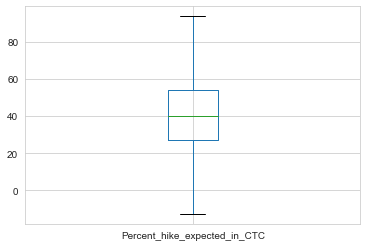

In [37]:
LS,HS = removeoutlier(final_df['Percent_hike_expected_in_CTC'])
final_df['Percent_hike_expected_in_CTC'] = np.where(final_df['Percent_hike_expected_in_CTC'] > HS,HS,final_df['Percent_hike_expected_in_CTC'])
final_df['Percent_hike_expected_in_CTC'] = np.where(final_df['Percent_hike_expected_in_CTC'] < LS,LS,final_df['Percent_hike_expected_in_CTC'])
final_df.boxplot(column=['Percent_hike_expected_in_CTC'])
plt.show

##### > Outliers in 'Percent_hike_offered_in_CTC' column

<function matplotlib.pyplot.show(close=None, block=None)>

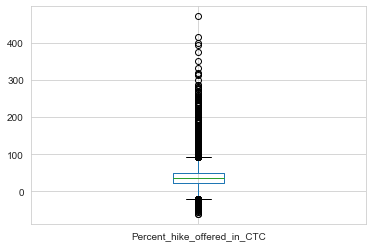

In [38]:
final_df.boxplot(column = ['Percent_hike_offered_in_CTC'])
plt.show

> We notice outliers in column Percent_hike_offered_in_CTC below 0 and above 90 (approx)

##### >> Outlier treatment for Percent_hike_expected_in_CTC column

<function matplotlib.pyplot.show(close=None, block=None)>

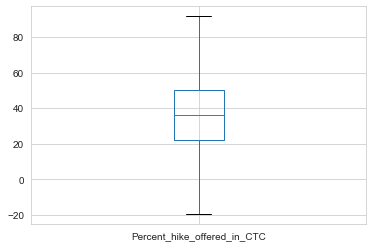

In [39]:
LS,HS = removeoutlier(final_df['Percent_hike_offered_in_CTC'])
final_df['Percent_hike_offered_in_CTC'] = np.where(final_df['Percent_hike_offered_in_CTC'] > HS,HS,final_df['Percent_hike_offered_in_CTC'])
final_df['Percent_hike_offered_in_CTC'] = np.where(final_df['Percent_hike_offered_in_CTC'] < LS,LS,final_df['Percent_hike_offered_in_CTC'])
final_df.boxplot(column=['Percent_hike_offered_in_CTC'])
plt.show

##### > Outliers in column'Percent_difference_CTC'

<function matplotlib.pyplot.show(close=None, block=None)>

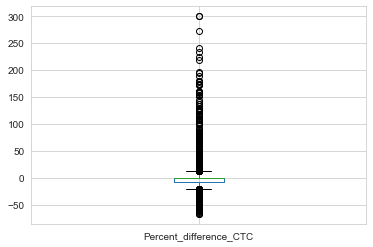

In [40]:
final_df.boxplot(column = ['Percent_difference_CTC'])
plt.show

>  We notice outliers in column Percent_differnce_CTC below 0 and above 0 (approx)

#### >> Outliers treatment for Percent_difference_CTC column

<function matplotlib.pyplot.show(close=None, block=None)>

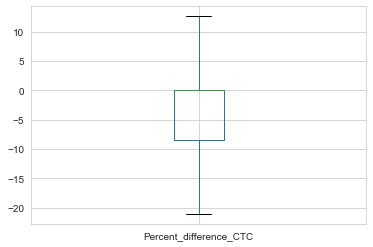

In [41]:
LS,HS = removeoutlier(final_df['Percent_difference_CTC'])
final_df['Percent_difference_CTC'] = np.where(final_df['Percent_difference_CTC'] > HS,HS,final_df['Percent_difference_CTC'])
final_df['Percent_difference_CTC'] = np.where(final_df['Percent_difference_CTC'] < LS,LS,final_df['Percent_difference_CTC'])
final_df.boxplot(column=['Percent_difference_CTC'])
plt.show


## Data scaling and  Data Transformation

### > Min-Max scaling

#### Set seed for reproducibility

In [42]:
np.random.seed(0)

In [43]:
data_for_scaling=final_df[['Notice_Period', 'Percent_hike_expected_in_CTC','Percent_hike_offered_in_CTC',
                                                               'Percent_difference_CTC','Rex_in_Yrs']]

#### MinMax estimator scales and translates each feature individually such that it is in the given range on the training set, e.g. between zero and one.

#### Define min-max scaler

In [44]:
scaler = MinMaxScaler()

#### Transform data

In [45]:
scaled = scaler.fit_transform(data_for_scaling)
scaled

array([[0.25      , 0.        , 0.29370504, 1.        , 0.29166667],
       [0.5       , 0.49802483, 0.45935252, 0.43942993, 0.04166667],
       [0.25      , 0.30662152, 0.35521583, 0.625     , 0.41666667],
       ...,
       [0.        , 0.17080512, 0.17535971, 0.46882423, 0.16666667],
       [0.25      , 0.14700903, 0.25710432, 0.79958432, 0.29166667],
       [0.5       , 0.52163281, 0.43228417, 0.32808789, 0.125     ]])

#### Perform a robust scaler transform of the dataset

In [46]:
trans = MinMaxScaler()
data = trans.fit_transform(data_for_scaling)

#### Convert the array back to a dataframe

In [47]:
dataset = pd.DataFrame(data)

#### Summarize data

In [48]:
print(dataset.describe())

                 0            1            2            3            4
count  8955.000000  8955.000000  8955.000000  8955.000000  8955.000000
mean      0.327610     0.514856     0.515073     0.527372     0.176559
std       0.185062     0.214429     0.224864     0.261934     0.106131
min       0.000000     0.000000     0.000000     0.000000     0.000000
25%       0.250000     0.375000     0.375000     0.375000     0.125000
50%       0.250000     0.494733     0.498921     0.625000     0.166667
75%       0.500000     0.625000     0.625000     0.625000     0.250000
max       1.000000     1.000000     1.000000     1.000000     1.000000


#### Plots of the variables

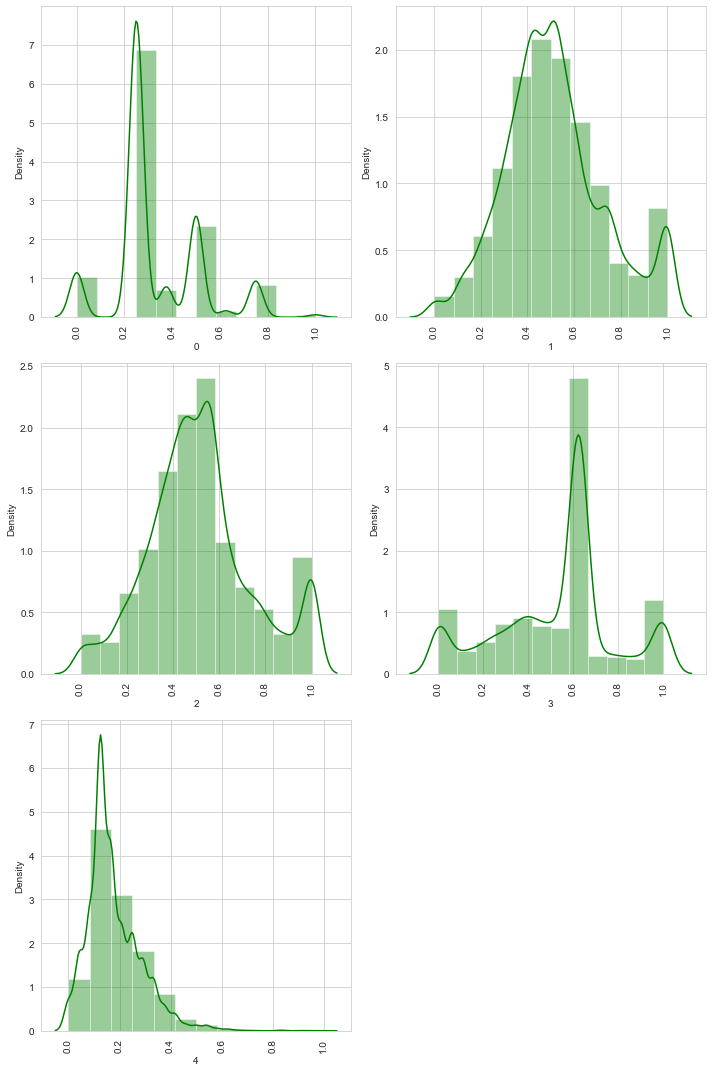

In [55]:
fig=plt.subplots(figsize=(10,15))
length=5
for i,j in itertools.zip_longest(dataset.columns,range(length)):
    plt.subplot(np.ceil(length/2),2,j+1)
    plt.subplots_adjust(hspace=.5)
    sns.distplot(dataset[i],bins=12,color='green')
    plt.xticks(rotation=90)
    plt.tight_layout()

### > Z-Score Normalization

#### Apply the z-score method in Pandas using the .mean() and .std() methods

In [50]:
def z_score(df):
    df_std = data_for_scaling.copy()
    for column in df_std.columns:
        df_std[column] = (df_std[column] - df_std[column].mean()) / df_std[column].std()
        
    return df_std
    
df_standardized = z_score(data_for_scaling)
df_standardized

,Notice_Period,Percent_hike_expected_in_CTC,Percent_hike_offered_in_CTC,Percent_difference_CTC,Rex_in_Yrs
0,-0.419375,-2.401054,-0.984452,1.804381,1.084581
1,0.931526,-0.078494,-0.247796,-0.335740,-1.270993
2,-0.419375,-0.971111,-0.710906,0.372722,2.262369
3,-0.419375,2.262489,0.203316,-2.013378,-0.093206
4,-0.419375,-0.873735,-2.290598,-2.013378,-0.878397
...,...,...,...,...,...
8977,-0.419375,-0.429400,-0.804887,-0.886640,0.299390
8978,-0.419375,-0.142534,0.044547,0.372722,-0.485802
8979,-1.770277,-1.604497,-1.510750,-0.223520,-0.093206
8980,-0.419375,-1.715471,-1.147221,1.039243,1.084581


#### Create a scaler object

In [51]:
std_scaler = StandardScaler()
std_scaler

StandardScaler()

#### Fit and transform the data

In [52]:
df_std = pd.DataFrame(std_scaler.fit_transform(data_for_scaling), columns=data_for_scaling.columns)
df_std

,Notice_Period,Percent_hike_expected_in_CTC,Percent_hike_offered_in_CTC,Percent_difference_CTC,Rex_in_Yrs
0,-0.419399,-2.401188,-0.984507,1.804482,1.084642
1,0.931578,-0.078498,-0.247810,-0.335759,-1.271064
2,-0.419399,-0.971165,-0.710945,0.372742,2.262495
3,-0.419399,2.262615,0.203328,-2.013490,-0.093211
4,-0.419399,-0.873784,-2.290726,-2.013490,-0.878447
...,...,...,...,...,...
8950,-0.419399,-0.429424,-0.804932,-0.886690,0.299407
8951,-0.419399,-0.142542,0.044550,0.372742,-0.485829
8952,-1.770376,-1.604586,-1.510834,-0.223532,-0.093211
8953,-0.419399,-1.715567,-1.147285,1.039301,1.084642


#### Population standard deviation with Pandas

In [53]:
data_for_scaling.std(ddof=0)

Notice_Period                   22.206146
Percent_hike_expected_in_CTC    22.796847
Percent_hike_offered_in_CTC     25.003474
Percent_difference_CTC           8.821436
Rex_in_Yrs                       2.547007
dtype: float64

#### Plots of variables

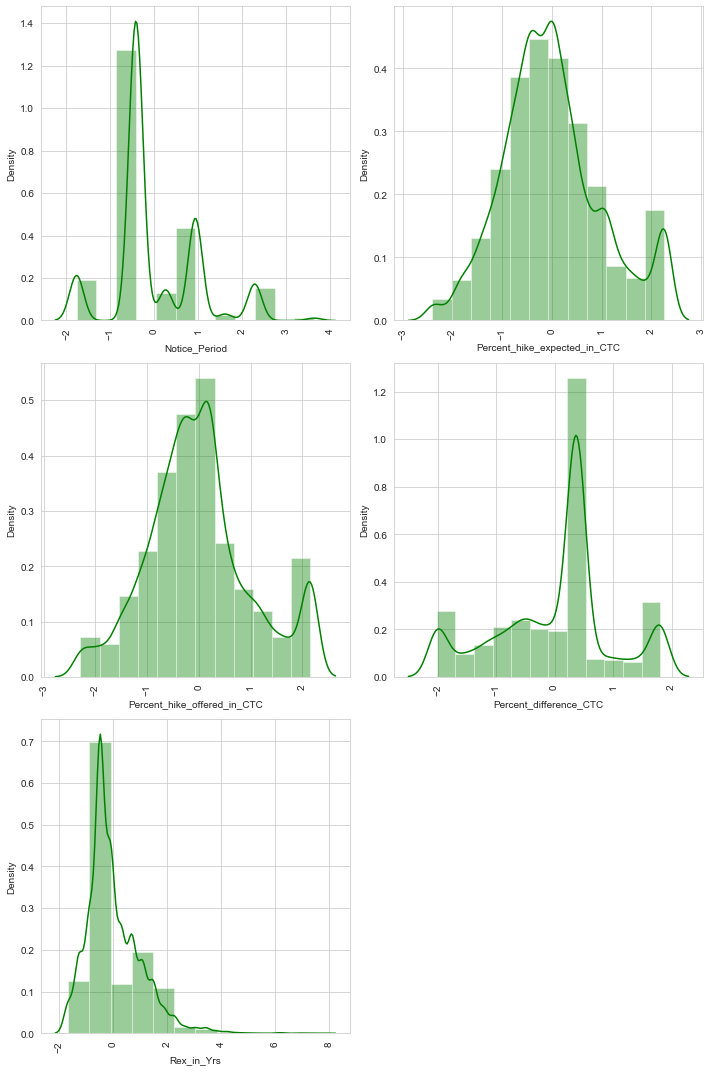

In [54]:
fig=plt.subplots(figsize=(10,15))
length=5
for i,j in itertools.zip_longest(df_std.columns,range(length)):
    plt.subplot(np.ceil(length/2),2,j+1)
    plt.subplots_adjust(hspace=.5)
    sns.distplot(df_std[i],bins=12,color='green')
    plt.xticks(rotation=90)
    plt.tight_layout()

### 5- Feature Engineering

### > Encoding

#### >> One hot encoding

In [56]:
data_for_encoding=final_df[['Candidate_Ref','Status']]
data_for_encoding.head()

,Candidate_Ref,Status
0,2110407,Joined
1,2605197,Joined
2,2127782,Joined
3,2138445,Joined
4,2150946,Joined


#### Selecting unique columns from Status

In [57]:
data_for_encoding['Status'].unique()

array(['Joined', 'Not Joined'], dtype=object)

#### Converting Status column into dummy variables

In [58]:
pd.get_dummies(data_for_encoding,drop_first=True).head(20)

,Candidate_Ref,Status_Not Joined
0,2110407,0
1,2605197,0
2,2127782,0
3,2138445,0
4,2150946,0
5,2226400,0
6,2463974,0
7,2820376,0
8,2851167,0
9,3257017,0


In [59]:
lst=data_for_encoding.Status.value_counts().sort_values(ascending=False).head(10).index
lst=list(lst)
for categories in lst:
    data_for_encoding[categories]=np.where(data_for_encoding['Status']==categories,1,0)
lst.append('Status')  
data_for_encoding[lst].head(20)

,Joined,Not Joined,Status
0,1,0,Joined
1,1,0,Joined
2,1,0,Joined
3,1,0,Joined
4,1,0,Joined
5,1,0,Joined
6,1,0,Joined
7,1,0,Joined
8,1,0,Joined
9,1,0,Joined


> Demonstration of dummies or indicators using one hot encoding

#### >> Effect encoding

In [60]:
encoder=ce.sum_coding.SumEncoder(cols='Status',verbose=False,) 
encoder.fit_transform(data_for_encoding).head(10)

,intercept,Candidate_Ref,Status_0,Joined,Not Joined
0,1,2110407,1.0,1,0
1,1,2605197,1.0,1,0
2,1,2127782,1.0,1,0
3,1,2138445,1.0,1,0
4,1,2150946,1.0,1,0
5,1,2226400,1.0,1,0
6,1,2463974,1.0,1,0
7,1,2820376,1.0,1,0
8,1,2851167,1.0,1,0
9,1,3257017,1.0,1,0


> Demonstration of effect encoding

#### >> Dummy Encoding

In [61]:
location_column=final_df[['Location_ID','Location']]
data_encoded=pd.get_dummies(data=location_column,drop_first=True, columns=['Location'])
data_encoded.head(20)

,Location_ID,Location_Bangalore,Location_Chennai,Location_Cochin,Location_Gurgaon,Location_Hyderabad,Location_Kolkata,Location_Mumbai,Location_Noida,Location_Pune
0,L001,0,0,0,0,0,0,0,1,0
1,L001,0,0,0,0,0,0,0,1,0
2,L001,0,0,0,0,0,0,0,1,0
3,L001,0,0,0,0,0,0,0,1,0
4,L001,0,0,0,0,0,0,0,1,0
5,L001,0,0,0,0,0,0,0,1,0
6,L001,0,0,0,0,0,0,0,1,0
7,L001,0,0,0,0,0,0,0,1,0
8,L001,0,0,0,0,0,0,0,1,0
9,L001,0,0,0,0,0,0,0,1,0


> Demonstration of Dummy encoding

#### >> Hash encoding

In [62]:
domicile_data=final_df[['Domicile_Id','Domicile_Name']]
domicile_data.head()

,Domicile_Id,Domicile_Name
0,D6,Goa
1,D6,Goa
2,D6,Goa
3,D6,Goa
4,D6,Goa


#### Fitting data for transformation

In [63]:
data_encoded=ce.BinaryEncoder().fit_transform(domicile_data) 
data_encoded.head(20)

,Domicile_Id_0,Domicile_Id_1,Domicile_Id_2,Domicile_Id_3,Domicile_Id_4,Domicile_Name_0,Domicile_Name_1,Domicile_Name_2,Domicile_Name_3,Domicile_Name_4
0,0,0,0,0,1,0,0,0,0,1
1,0,0,0,0,1,0,0,0,0,1
2,0,0,0,0,1,0,0,0,0,1
3,0,0,0,0,1,0,0,0,0,1
4,0,0,0,0,1,0,0,0,0,1
5,0,0,0,0,1,0,0,0,0,1
6,0,0,0,0,1,0,0,0,0,1
7,0,0,0,0,1,0,0,0,0,1
8,0,0,0,0,1,0,0,0,0,1
9,0,0,0,0,1,0,0,0,0,1


> Demonstration of Hash encoding

#### >> BaseN encoding

In [64]:
encoder= ce.BaseNEncoder(return_df=True,base=4)
data_encoded=encoder.fit_transform(domicile_data)
data_encoded.tail(20)

,Domicile_Id_0,Domicile_Id_1,Domicile_Id_2,Domicile_Name_0,Domicile_Name_1,Domicile_Name_2
8962,1,1,3,1,1,3
8963,1,1,3,1,1,3
8964,1,1,3,1,1,3
8965,1,1,3,1,1,3
8966,1,1,3,1,1,3
8967,1,1,3,1,1,3
8968,1,1,3,1,1,3
8969,1,1,3,1,1,3
8970,1,1,3,1,1,3
8971,1,1,3,1,1,3


> Demonstration of BaseN encoding

#### >> Binning

#### Binning with range

In [65]:
bins = [0,100,200,300,400,500 ]
final_df['binned'] = pd.cut(final_df['Percent_hike_offered_in_CTC'], bins)
final_df.head()

,Sno,Candidate_Ref,DOJ_Extended,Duration_to_accept_offer,Notice_Period,Offered_Band,Percent_hike_expected_in_CTC,Percent_hike_offered_in_CTC,Percent_difference_CTC,Joining_Bonus,...,Age,LOB_Id,Domicile_Id,Status,Location,Region_ID,Region_Name,Domicile_Name,LOB,binned
0,1,2110407,Yes,14.0,30,E2,-12.60,13.16,12.63,No,...,34.0,1,D6,Joined,Noida,R1,North,Goa,ERS,"(0.0, 100.0]"
1,195,2605197,No,1.0,60,E1,40.35,31.58,-6.25,No,...,25.0,1,D6,Joined,Noida,R1,North,Goa,ERS,"(0.0, 100.0]"
2,588,2127782,No,17.0,30,E3,20.00,20.00,0.00,No,...,36.0,1,D6,Joined,Noida,R1,North,Goa,ERS,"(0.0, 100.0]"
3,632,2138445,No,2.0,30,E1,93.72,42.86,-21.05,No,...,30.0,1,D6,Joined,Noida,R1,North,Goa,ERS,"(0.0, 100.0]"
4,688,2150946,Yes,4.0,30,E1,22.22,-19.50,-21.05,No,...,26.0,1,D6,Joined,Noida,R1,North,Goa,ERS,NaN


> Binning in Percent_hike_offered_in_CTC column

#### Discretization of variable into equal-sized buckets using qcut

In [66]:
pd.qcut(final_df['Percent_hike_offered_in_CTC'], q=4)
final_df['value_1'] = pd.qcut(final_df['Percent_hike_offered_in_CTC'], q=4)
final_df['value_2'] = pd.qcut(final_df['Percent_hike_offered_in_CTC'], q=10, precision=0)

In [67]:
final_df.head(10)

,Sno,Candidate_Ref,DOJ_Extended,Duration_to_accept_offer,Notice_Period,Offered_Band,Percent_hike_expected_in_CTC,Percent_hike_offered_in_CTC,Percent_difference_CTC,Joining_Bonus,...,Domicile_Id,Status,Location,Region_ID,Region_Name,Domicile_Name,LOB,binned,value_1,value_2
0,1,2110407,Yes,14.0,30,E2,-12.60,13.16,12.63,No,...,D6,Joined,Noida,R1,North,Goa,ERS,"(0.0, 100.0]","(-19.501, 22.2]","(8.0, 18.0]"
1,195,2605197,No,1.0,60,E1,40.35,31.58,-6.25,No,...,D6,Joined,Noida,R1,North,Goa,ERS,"(0.0, 100.0]","(22.2, 35.98]","(31.0, 36.0]"
2,588,2127782,No,17.0,30,E3,20.00,20.00,0.00,No,...,D6,Joined,Noida,R1,North,Goa,ERS,"(0.0, 100.0]","(-19.501, 22.2]","(18.0, 25.0]"
3,632,2138445,No,2.0,30,E1,93.72,42.86,-21.05,No,...,D6,Joined,Noida,R1,North,Goa,ERS,"(0.0, 100.0]","(35.98, 50.0]","(43.0, 45.0]"
4,688,2150946,Yes,4.0,30,E1,22.22,-19.50,-21.05,No,...,D6,Joined,Noida,R1,North,Goa,ERS,NaN,"(-19.501, 22.2]","(-21.0, 8.0]"
5,1627,2226400,No,0.0,75,E1,53.33,53.33,0.00,No,...,D6,Joined,Noida,R1,North,Goa,ERS,"(0.0, 100.0]","(50.0, 91.7]","(45.0, 56.0]"
6,4449,2463974,No,0.0,60,E1,22.22,38.89,12.63,No,...,D6,Joined,Noida,R1,North,Goa,ERS,"(0.0, 100.0]","(35.98, 50.0]","(36.0, 43.0]"
7,6416,2820376,Yes,5.0,60,E1,33.33,27.78,-4.17,No,...,D6,Joined,Noida,R1,North,Goa,ERS,"(0.0, 100.0]","(22.2, 35.98]","(25.0, 31.0]"
8,6721,2851167,No,0.0,60,E2,33.33,48.89,11.67,Yes,...,D6,Joined,Noida,R1,North,Goa,ERS,"(0.0, 100.0]","(35.98, 50.0]","(45.0, 56.0]"
9,8160,3257017,No,2.0,30,E1,33.33,31.11,-1.67,No,...,D6,Joined,Noida,R1,North,Goa,ERS,"(0.0, 100.0]","(22.2, 35.98]","(31.0, 36.0]"


In [68]:
print("Counts for value 1 \n")
print(final_df['value_1'].value_counts())
print()
print("*"*100)
print("\n Counts for value 2 \n")
print(final_df['value_2'].value_counts())

Counts for value 1 

(35.98, 50.0]      2355
(-19.501, 22.2]    2239
(22.2, 35.98]      2239
(50.0, 91.7]       2122
Name: value_1, dtype: int64

****************************************************************************************************

 Counts for value 2 

(18.0, 25.0]    935
(-21.0, 8.0]    914
(36.0, 43.0]    906
(56.0, 75.0]    903
(45.0, 56.0]    898
(8.0, 18.0]     894
(31.0, 36.0]    894
(43.0, 45.0]    886
(75.0, 92.0]    884
(25.0, 31.0]    841
Name: value_2, dtype: int64


#### Custom bin

In [69]:
np.linspace(0,500, 5)
pd.cut(final_df['Percent_hike_offered_in_CTC'], bins=np.linspace(0, 500,5))

0       (0.0, 125.0]
1       (0.0, 125.0]
2       (0.0, 125.0]
3       (0.0, 125.0]
4                NaN
            ...     
8977    (0.0, 125.0]
8978    (0.0, 125.0]
8979             NaN
8980    (0.0, 125.0]
8981    (0.0, 125.0]
Name: Percent_hike_offered_in_CTC, Length: 8955, dtype: category
Categories (4, interval[float64, right]): [(0.0, 125.0] < (125.0, 250.0] < (250.0, 375.0] < (375.0, 500.0]]

> Demostration of Custom bin on 'Percent_hike_offered_in_CTC'

#### Interval bin

In [70]:
pd.interval_range(-100,500,freq=100)
pd.cut(final_df['Percent_hike_offered_in_CTC'], bins= pd.interval_range(-100,500,freq=100)).head(100)

0      (0, 100]
1      (0, 100]
2      (0, 100]
3      (0, 100]
4     (-100, 0]
        ...    
95     (0, 100]
96     (0, 100]
97     (0, 100]
98     (0, 100]
99     (0, 100]
Name: Percent_hike_offered_in_CTC, Length: 100, dtype: category
Categories (6, interval[int64, right]): [(-100, 0] < (0, 100] < (100, 200] < (200, 300] < (300, 400] < (400, 500]]

> Demonstration of Interval bin

##  Model building using ML algorithms

### Let's Talk with data

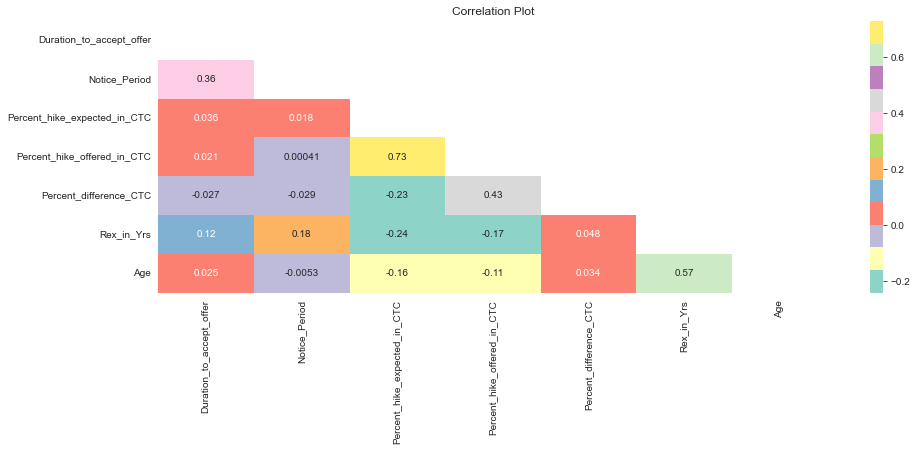

In [71]:
import seaborn as sns
data_vis=final_df[['Duration_to_accept_offer','Notice_Period','Percent_hike_expected_in_CTC','Percent_hike_offered_in_CTC','Percent_difference_CTC','Rex_in_Yrs','Age','Status']]
fig,ax=plt.subplots(figsize=(15,5))
mask = np.zeros_like(data_vis.corr())
mask[np.triu_indices_from(data_vis.corr())] = True
sns.heatmap(data_vis.corr(),cmap='Set3',annot=True,mask=mask,ax=ax)
plt.title('Correlation Plot')
plt.show()

#### Count plot for the categorical variables

#### Extracting categorical variables

In [72]:
category_col = ['DOJ_Extended','Offered_Band', 'Joining_Bonus', 'Candidate_relocate_actual', 
       'Gender','Candidate_Source', 'LOB', 'Location', 'Status']

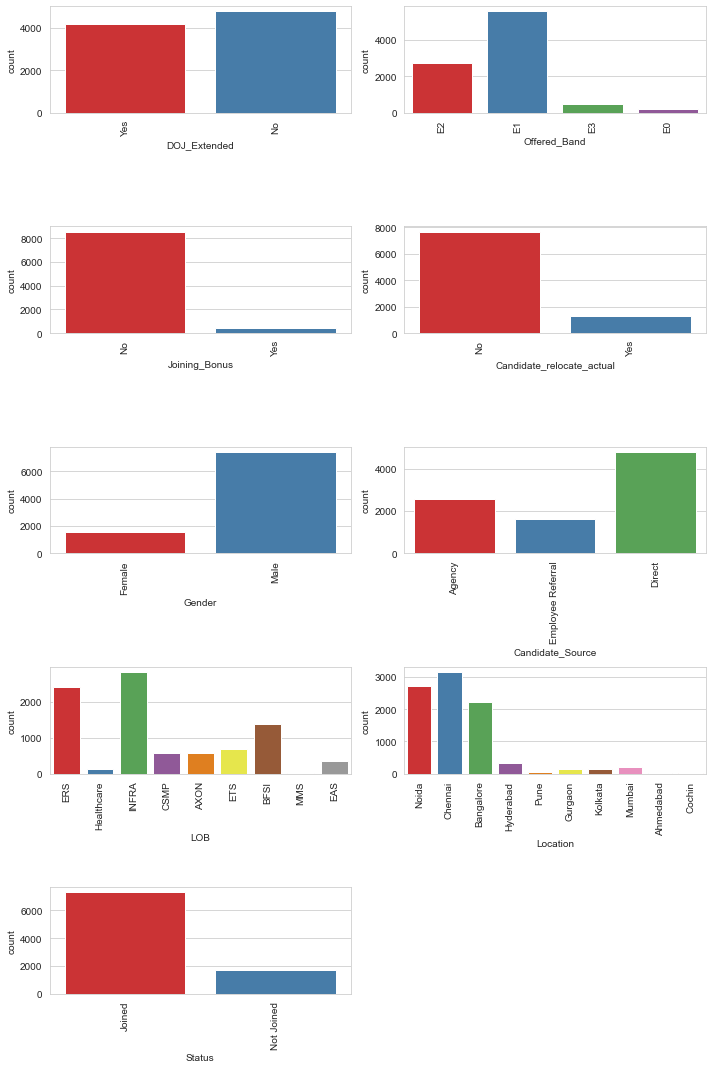

In [73]:
fig=plt.subplots(figsize=(10,15))
length=len(category_col)
for i,j in itertools.zip_longest(category_col,range(length)):
    plt.subplot(np.ceil(length/2),2,j+1)
    plt.subplots_adjust(hspace=.5)
    sns.countplot(x=i,data = data_for_model,palette='Set1')
    plt.xticks(rotation=90)
    plt.tight_layout()

#### Inferences from the above plots
>Most of the candidates didn't ask for date of joining extension (DOJ).

>Most of the candidates transmitted to band 'E1' based on experience and performance in the interview rounds .

>Most of the candidates have not received  joining bonus.

>Most of the candidates have not relocated to a new city.

>Most of the candidates are Males.

>Most of the resumes obtained are 'direct' and followed by the 'Agency'.

>Most fields offered are INFRA followed by ERS and BFSI.

>Most of the candidates got Chennai as their joining location followed by Bangalore and Noida

>Most candidates have joined the firm.

In [74]:
data_for_model.isnull().sum()
data_for_model=data_for_model[data_for_model['Age'].notna()]
data_for_model=data_for_model[data_for_model['Offered_Band'].notna()]
data_for_model.isnull().sum()

Sno                             0
Candidate_Ref                   0
DOJ_Extended                    0
Duration_to_accept_offer        0
Notice_Period                   0
Offered_Band                    0
Percent_hike_expected_in_CTC    0
Percent_hike_offered_in_CTC     0
Percent_difference_CTC          0
Joining_Bonus                   0
Candidate_relocate_actual       0
Gender                          0
Candidate_Source                0
Rex_in_Yrs                      0
Location_ID                     0
Postal_Code                     0
Age                             0
LOB_Id                          0
Domicile_Id                     0
Status                          0
Location                        0
Region_ID                       0
Region_Name                     0
Domicile_Name                   0
LOB                             0
dtype: int64

#### Dropping columns which are not-required

In [75]:
to_drop=['Sno','Candidate_Ref','Postal_Code','Domicile_Id','Region_ID','Region_Name','Domicile_Name','LOB_Id','Location_ID']
data_for_model.drop(to_drop,axis=1,inplace=True)

#### Selecting target variable and Predictors

In [76]:
features=data_for_model.drop(['Status'],axis=1)
target=data_for_model['Status']

#### Encoding the target variable to binary >>> Joined to '0' Not Joined to '1'

In [77]:
target.replace(['Joined','Not Joined'],[0,1],inplace=True)

#### Count plot for the Target variable

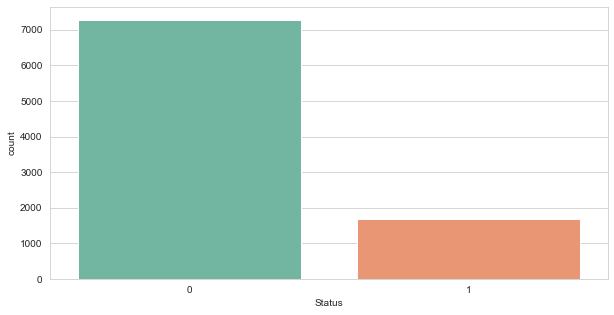

In [78]:
fig,ax=plt.subplots(figsize=(10,5))
sns.countplot(data_for_model['Status'],ax=ax,palette="Set2")
plt.show()

>From the above observation we can infer that the target variable "Status" is not balanced in nature. We can observe from the above plot, the number of candidates joined are more in number than the not joined ones. Even though the model accuracy will be good enough, the predictions made will be wrong. So in order to balance the dataset we shall use the Synthetic Minority Oversample Technique ( SMOTE ).

#### Creating dummies

In [79]:
xd = pd.get_dummies(features,drop_first=True)

In [80]:
xd.keys()

Index(['Duration_to_accept_offer', 'Notice_Period',
       'Percent_hike_expected_in_CTC', 'Percent_hike_offered_in_CTC',
       'Percent_difference_CTC', 'Rex_in_Yrs', 'Age', 'DOJ_Extended_Yes',
       'Offered_Band_E1', 'Offered_Band_E2', 'Offered_Band_E3',
       'Joining_Bonus_Yes', 'Candidate_relocate_actual_Yes', 'Gender_Male',
       'Candidate_Source_Direct', 'Candidate_Source_Employee Referral',
       'Location_Bangalore', 'Location_Chennai', 'Location_Cochin',
       'Location_Gurgaon', 'Location_Hyderabad', 'Location_Kolkata',
       'Location_Mumbai', 'Location_Noida', 'Location_Pune', 'LOB_BFSI',
       'LOB_CSMP', 'LOB_EAS', 'LOB_ERS', 'LOB_ETS', 'LOB_Healthcare',
       'LOB_INFRA', 'LOB_MMS'],
      dtype='object')

#### Balancing the dataset using the SMOTE

In [81]:
x_resam,y_resam = SMOTE(k_neighbors=5).fit_resample(xd,target)
np.random.seed(1001)

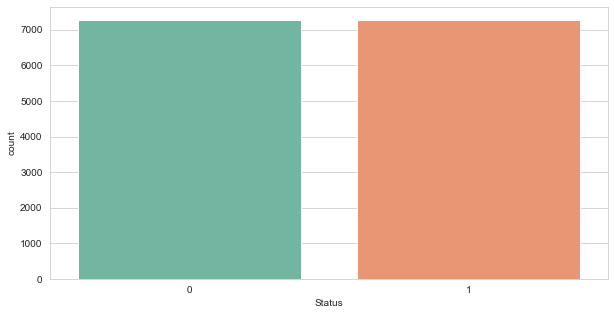

In [82]:
fig,ax=plt.subplots(figsize=(10,5))
sns.countplot(pd.Series(y_resam),ax=ax,palette="Set2")
plt.show()

#### Spliting to train,test

In [83]:
x_train,x_test,y_train,y_test = train_test_split(x_resam,y_resam,test_size=0.2)

#### Checking shape of train,test

In [84]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((11643, 33), (2911, 33), (11643,), (2911,))

### Comparing Predictive models on a dataset

#### Performance of LogisticRegression

In [91]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 10)
classifier.fit(x_train,y_train)
LogReg = (round(classifier.score(x_test, y_test), 2))*100
print(LogReg,"%")

82.0 %


#### Performance of DecisionTreeClassifier

In [92]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(criterion = 'entropy', random_state = 10)
dt.fit(x_train,y_train)
dtm = (round(dt.score(x_test, y_test), 2))*100
print(dtm,"%")

83.0 %


#### Performance of KNNClassifier

In [93]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
knn.fit(x_train,y_train)
kn = (round(knn.score(x_test, y_test), 2))*100
print(kn,"%")


78.0 %


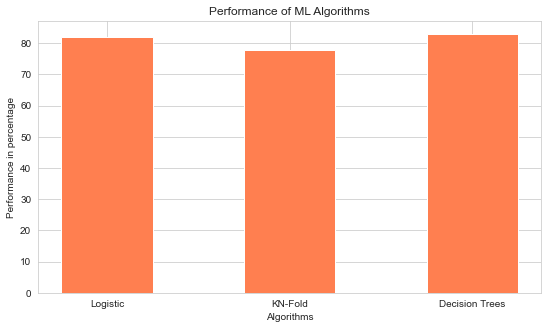

In [94]:
names=['Logistic','KN-Fold','Decision Trees']
values=[]
values.extend([LogReg,kn,dtm])
fig=plt.figure(figsize=(9,5))
plt.bar(names,values,color='coral',width=0.5)
plt.xlabel("Algorithms")
plt.ylabel("Performance in percentage")
plt.title("Performance of ML Algorithms")
plt.show()

### Decision Tree

#### Initializing tree_1 as DecisionTreeClassifier

In [95]:
tree_1 = DecisionTreeClassifier(criterion='gini',max_depth=None,max_features=17)

#### Fitting into a model

In [96]:
tree_1.fit(x_train,y_train)

DecisionTreeClassifier(max_features=17)

#### Checking max_depth

In [97]:
tree_1.tree_.max_depth

26

#### Checking important features

In [98]:
imp_feature = tree_1.tree_.compute_feature_importances()

#### Plotting important features

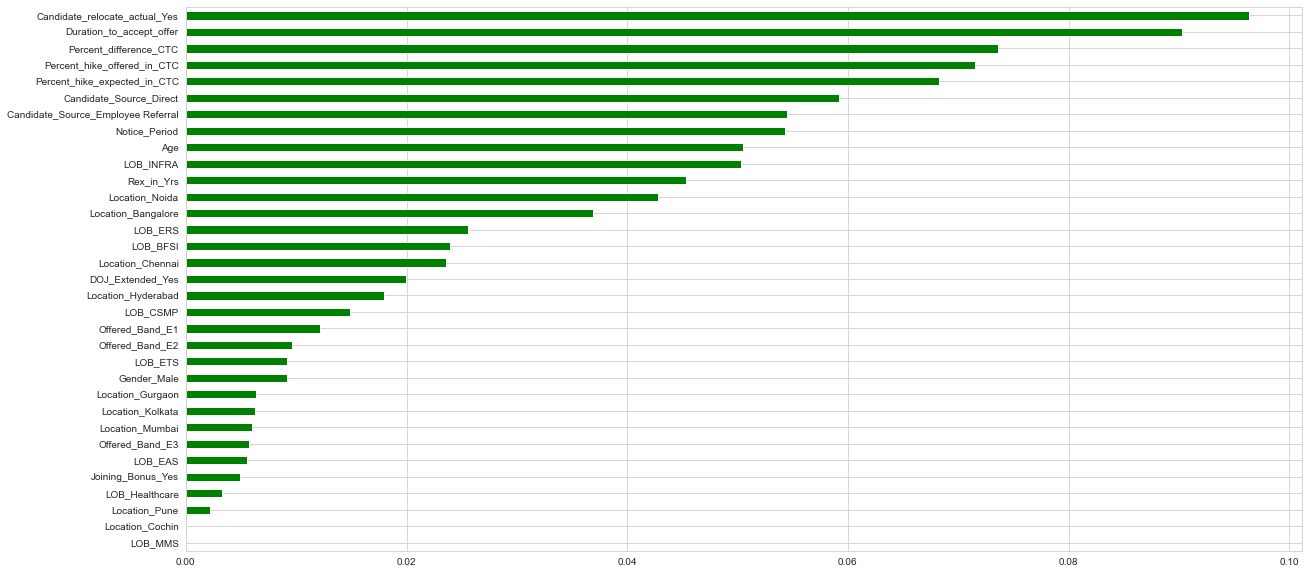

In [99]:
plt.figure(figsize=(20,10))
pd.Series(imp_feature,index=xd.columns).sort_values().plot(kind='barh',color='green')
plt.show()

#### Checking score of train and test


In [100]:
tree_1.score(x_train,y_train),tree_1.score(x_test,y_test)

(0.9966503478484926, 0.8230848505668156)

#### Predicting train values

In [101]:
y_train_pred = tree_1.predict(x_train)

### Evaluating the performance of the model

#### Predicting test values

In [102]:
y_test_pred = tree_1.predict(x_test)

#### Taking prob of positive of test

In [103]:
y_test_prob = tree_1.predict_proba(x_test)[:,1]

## Represent the Confusion Matrix in a heat map format by using the seaborn package

Text(0.5, 16.0, 'Predicted label')

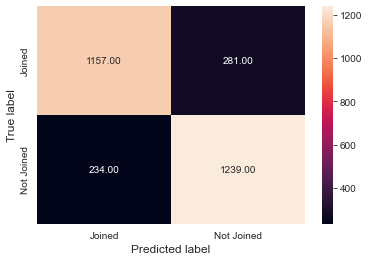

In [104]:
cm = metrics.confusion_matrix(y_test,y_test_pred)
sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels = ["Joined", "Not Joined"] , yticklabels = ["Joined", "Not Joined"],)
plt.ylabel('True label',fontsize=12)
plt.xlabel('Predicted label',fontsize=12)

#### Classification metric

In [105]:
print(metrics.classification_report(y_test,y_test_pred,digits=2))

              precision    recall  f1-score   support

           0       0.83      0.80      0.82      1438
           1       0.82      0.84      0.83      1473

    accuracy                           0.82      2911
   macro avg       0.82      0.82      0.82      2911
weighted avg       0.82      0.82      0.82      2911



### Issues and Concerns on the given data and the best techniques to overcome the issues

### Pruning

#### A Simple pruning function for plotting the scores of train and test using different criterion like "gini","entropy".

  

In [108]:
def pruning(x_train,y_train,x_test,y_test,criterion,max_depth):
  train_acc = []
  test_acc = []
  depth = np.arange(2,max_depth)
  for i in depth:
    model_purning = DecisionTreeClassifier(criterion=criterion,max_depth=i)
    model_purning.fit(x_train,y_train)
    train_a = model_purning.score(x_train,y_train)
    test_a = model_purning.score(x_test,y_test)
    train_acc.append(train_a)
    test_acc.append(test_a)

  plt.figure(figsize=(10,6))
  plt.plot(depth,train_acc)
  plt.plot(depth,test_acc)
  plt.xlabel('Depth')
  plt.ylabel('Score')
  plt.legend(['train','test'])
  plt.show()

#### Pruning with gini criterion

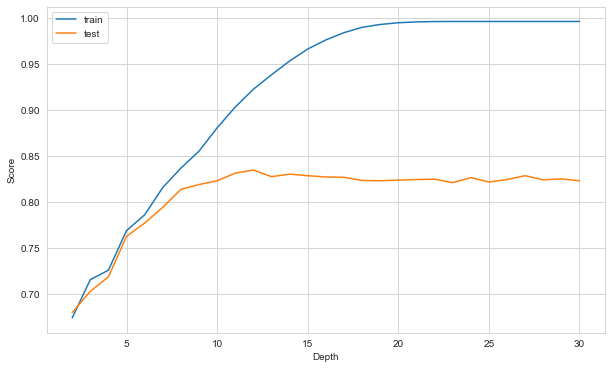

In [109]:
pruning(x_train,y_train,x_test,y_test,'gini',31)

#### Pruning with entropy criterion

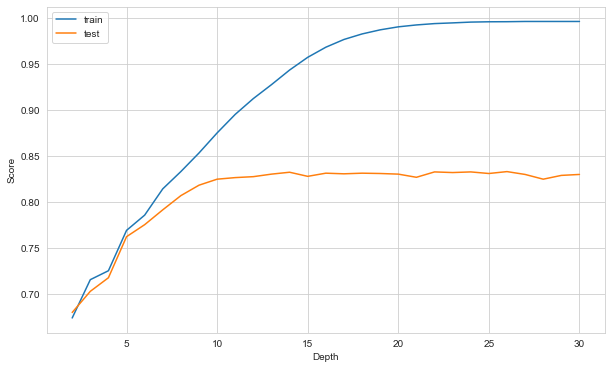

In [110]:
pruning(x_train,y_train,x_test,y_test,'entropy',31)

>**From above plots selecting max depth as the 12**

#### Now selecting the model with above value 12 and max_feature of 17

In [111]:
model_pur = DecisionTreeClassifier(criterion='gini',max_depth=11,max_features=17)
model_pur.fit(x_train,y_train)
yp_test_pred = model_pur.predict(x_test)
yp_test_prob = model_pur.predict_proba(x_test)[:,1]

#### Represent the enhanced Confusion Matrix in a heat map format by using the seaborn package.

Text(0.5, 16.0, 'Predicted label')

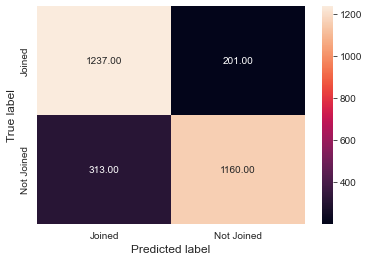

In [112]:
cm = metrics.confusion_matrix(y_test,yp_test_pred)
sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels = ["Joined", "Not Joined"] , yticklabels = ["Joined", "Not Joined"],)
plt.ylabel('True label',fontsize=12)
plt.xlabel('Predicted label',fontsize=12)

In [113]:
print(metrics.classification_report(y_test,yp_test_pred,digits=2))

              precision    recall  f1-score   support

           0       0.80      0.86      0.83      1438
           1       0.85      0.79      0.82      1473

    accuracy                           0.82      2911
   macro avg       0.83      0.82      0.82      2911
weighted avg       0.83      0.82      0.82      2911



#### On assuming same criteria for DecisionTree,
#### A Function for filtering the giving criteria which is the ratio between the FP's to FN's should be 3 times.

    cri: can be criterion for classsifer like 'gini' are 'entropy'.

    ratio: ratio between the FP's to FN (default its 3).

    You can select the max_depth and max_features which is index.

    Note: No Combinations are applied in this function. max_depth = max_features.

 

In [114]:
from sklearn.metrics import confusion_matrix, classification_report
def FP(x_train,y_train,cri,ratio=3):
  
  FP = []
  FN = []
  max_depth = np.arange(2,27)
  for m in max_depth:
    model_tune = DecisionTreeClassifier(criterion=cri,max_depth=m,max_features=m,random_state=0)
    model_tune.fit(x_train,y_train)
    y_pred = model_tune.predict(x_train)
    tn, fp, fn, tp = confusion_matrix(y_train,y_pred).ravel()
    FP.append(fp)
    FN.append(fn)
  MAX = pd.DataFrame(index=max_depth)
  MAX['FP'] = FP
  MAX['FN'] = FN
  MAX['Ratio'] = np.array(FP)/np.array(FN)
  return MAX[MAX["Ratio"]>ratio]


#### Ratio for gini

In [115]:
FP(x_train,y_train,'gini')

,FP,FN,Ratio
2,4771,576,8.282986


#### Ratio for entropy

In [116]:
FP(x_train,y_train,'entropy')

,FP,FN,Ratio
2,4771,576,8.282986


#### We can observe that near the max_depth of 4 the FP's to FN's ratio is quite ok. Its above 3 with entropy criterion.

In [117]:
model_para = DecisionTreeClassifier(criterion='entropy',max_depth=4,max_features=4,random_state=0)
model_para.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4, max_features=4,
                       random_state=0)

>Model with max_depth 4 and max_feature 4

Text(0.5, 16.0, 'Predicted label')

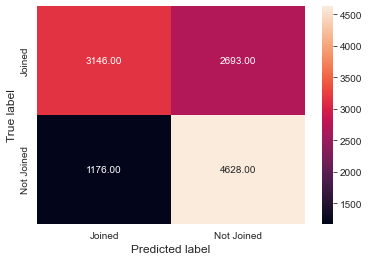

In [118]:
cm = metrics.confusion_matrix(y_train,model_para.predict(x_train))
sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels = ["Joined", "Not Joined"] , yticklabels = ["Joined", "Not Joined"],)
plt.ylabel('True label',fontsize=12)
plt.xlabel('Predicted label',fontsize=12)

#### Extracting important features again

In [119]:
imp_features = model_para.tree_.compute_feature_importances()

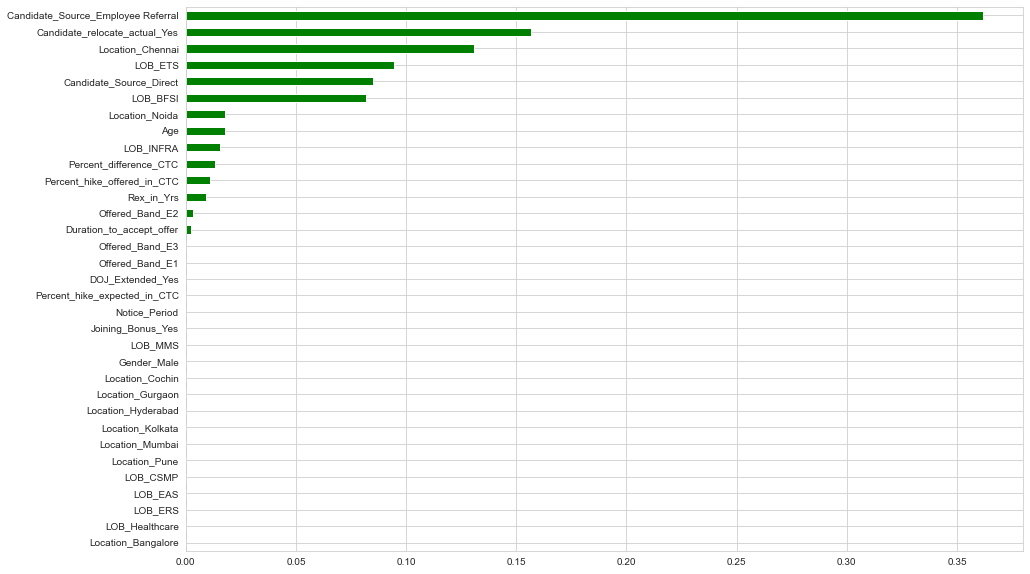

In [120]:
plt.figure(figsize=(15,10))
pd.Series(imp_features,index=xd.columns).sort_values().plot(kind='barh',color='green')
plt.show()

#### Getting Tree

In [121]:
export_graphviz(model_para,out_file='final.odt',
                feature_names=xd.columns,filled=True)
graph = pydotplus.graph_from_dot_file('final.odt')
graph.write_pdf('final.pdf')
graph.write_jpg('final.jpg')

True

#### Read and displaying the saved tree

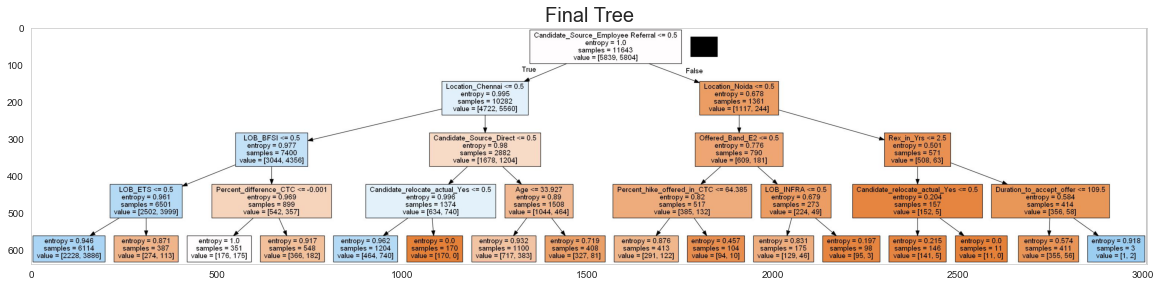

In [122]:
tree = mpimg.imread('final.jpg')
plt.figure(figsize=(20,20))
plt.title('Final Tree',fontsize=20)
plt.imshow(tree)
plt.grid()